# Formatting Eddy Data from MATLAB File

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fpath='/gscratch/jisao/mclaret/GL64/Juin_500m/'
f = h5py.File(fpath + 'eddy_tracks.mat')
print(list(f.keys()))

['#refs#', 'tracks', 'warn_tracks']


In [3]:
print(list(f['tracks']))

['Rd', 'aire1', 'aire2', 'aire3', 'calcul', 'dc', 'deta1', 'deta2', 'deta3', 'ellip1', 'ellip2', 'f', 'gama', 'ind', 'ind2', 'interaction', 'interaction2', 'large1', 'large2', 'nrho1', 'nrho2', 'nrho3', 'rmax1', 'rmax2', 'rmax3', 'shapes1', 'shapes2', 'shapes3', 'step', 'tau1', 'tau2', 'theta1', 'theta2', 'type', 'velmax1', 'velmax2', 'velmax3', 'weak', 'x1', 'x2', 'xbary1', 'xbary2', 'y1', 'y2', 'ybary1', 'ybary2']


In [4]:
data = f['tracks']

In [5]:
print(f[f[data['shapes1'][0,0]][(0,0)]])
print(np.array(f[f[data['shapes1'][0,0]][(0,0)]]))

<HDF5 dataset "Kf": shape (47, 2), type "<f8">
[[ 7.90625    42.5124346 ]
 [ 7.89871818 42.52757864]
 [ 7.890625   42.54094756]
 [ 7.88789439 42.54319811]
 [ 7.875      42.55250726]
 [ 7.859375   42.55492622]
 [ 7.84375    42.55264066]
 [ 7.828125   42.54812119]
 [ 7.81536611 42.54319811]
 [ 7.8125     42.54202176]
 [ 7.796875   42.53412567]
 [ 7.78555919 42.52757864]
 [ 7.78125    42.52490148]
 [ 7.765625   42.51424777]
 [ 7.76241732 42.51195917]
 [ 7.75       42.5016898 ]
 [ 7.74318435 42.4963397 ]
 [ 7.734375   42.48703723]
 [ 7.72706847 42.48072023]
 [ 7.71875    42.4673853 ]
 [ 7.71644321 42.46510076]
 [ 7.71875    42.46227541]
 [ 7.734375   42.45297456]
 [ 7.74217319 42.44948129]
 [ 7.75       42.44834251]
 [ 7.765625   42.44459045]
 [ 7.78125    42.43857227]
 [ 7.7890754  42.43386182]
 [ 7.796875   42.43096161]
 [ 7.8125     42.42263441]
 [ 7.81895412 42.41824235]
 [ 7.828125   42.41364635]
 [ 7.84375    42.40480815]
 [ 7.84829169 42.40262288]
 [ 7.859375   42.39800163]
 [ 7.875

In [6]:
"""
import h5py
import numpy as np
fpath='/gscratch/jisao/mclaret/GL64/Juin_500m/'
f = h5py.File(fpath + 'eddy_tracks.mat') """

# Arrange data into a list of dictionaries
data = f['tracks']            # relevant variables
varnames = list(f['tracks'])  # variable names
ntracks = len(data['x1'])     # number of tracks (should match with length of data in 'x1')

tracks = []                   # initialize list of eddy tracks

# add dictionaries for each variable to the corresponding eddy index (0 - N-1)
for itrack in range(ntracks):
    variables = {var:[] for var in varnames}  # initialize a dictionary with each variable name
    for var in varnames:
        # go through each variable
        if var[0:6] == 'shapes':
            # translate shapes data to list of numpy arrays (one array for each time step)
            coordinates = []                             # initialize list of coordinates
            numSteps = len(f[data[var][itrack,0]][(0)])  # number of timesteps
            # each timestep has its own hdf5 object reference, so append each step to a list
            for step in range(numSteps):
                coords = np.array(f[f[data[var][itrack,0]][(0, step)]])
                coordinates.append(coords)
            variables[var] = coordinates
        else:
            # translate data from hdf5 object reference to numpy array
            variables[var] = np.array(f[data[var][itrack,0]][(0)])
    tracks.append(variables)
    
print('Number of eddies:', len(tracks))

Number of eddies: 43


In [7]:
# verify array data translated correctly
print(tracks[0]['x1'])
print(tracks[0]['y1'])
print('num steps for eddy 1:', len(tracks[0]['step']))
print('num steps for eddy 43:', len(tracks[42]['step']))

[7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375
 7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375
 7.84375  7.84375  7.84375  7.828125 7.828125 7.828125 7.84375  7.84375 ]
[42.44948129 42.44948129 42.46510076 42.46510076 42.46510076 42.46510076
 42.46510076 42.46510076 42.46510076 42.44948129 42.44948129 42.44948129
 42.44948129 42.44948129 42.44948129 42.44948129 42.44948129 42.46510076
 42.46510076 42.48072023 42.48072023 42.48072023 42.48072023 42.48072023]
num steps for eddy 1: 24
num steps for eddy 43: 5


number of steps: 24
(47, 2)
(47, 2)


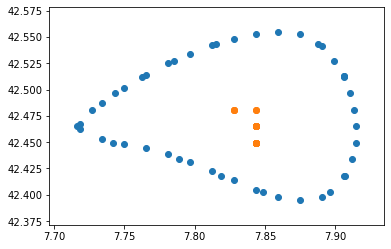

[7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375
 7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375
 7.84375  7.84375  7.84375  7.828125 7.828125 7.828125 7.84375  7.84375 ]
[42.44948129 42.44948129 42.46510076 42.46510076 42.46510076 42.46510076
 42.46510076 42.46510076 42.46510076 42.44948129 42.44948129 42.44948129
 42.44948129 42.44948129 42.44948129 42.44948129 42.44948129 42.46510076
 42.46510076 42.48072023 42.48072023 42.48072023 42.48072023 42.48072023]


In [8]:
# verify shapes data translated correctly
print('number of steps:', len(tracks[0]['shapes1']))
print(tracks[0]['shapes1'][0].shape)
print(tracks[0]['shapes1'][23].shape)
#print(tracks[0]['shapes1'][0]) # array of coordinates

# plot shape at time 0
coords = tracks[0]['shapes1'][0]
xs, ys = coords.T
plt.scatter(xs, ys)
plt.scatter(tracks[0]['x1'], tracks[0]['y1'])
plt.show()
print(tracks[0]['x1'])
print(tracks[0]['y1'])

# Filling Step Gaps

In [9]:
fpath_eddy = '/gscratch/jisao/mclaret/GL64/Juillet/'
f = h5py.File(fpath_eddy + 'eddy_tracks.mat')

# Arrange data into a list of dictionaries
data = f['tracks']            # relevant variables
varnames = list(f['tracks'])  # variable names
ntracks = len(data['x1'])     # number of tracks (should match with length of data in 'x1')

tracks = []                   # initialize list of eddy tracks

# add dictionaries for each variable to the corresponding eddy index (0 - N-1)
for itrack in range(ntracks):
    variables = {var:[] for var in varnames}  # initialize a dictionary with each variable name
    for var in varnames:
        # go through each variable
        if var[0:6] == 'shapes':
            # translate shapes data to list of numpy arrays (one array for each time step)
            coordinates = []                             # initialize list of coordinates
            numSteps = len(f[data[var][itrack,0]][(0)])  # number of timesteps
            # each timestep has its own hdf5 object reference, so append each step to a list
            for step in range(numSteps):
                coords = np.array(f[f[data[var][itrack,0]][(0, step)]])
                coordinates.append(coords)
            variables[var] = coordinates
        else:
            # translate data from hdf5 object reference to numpy array
            variables[var] = np.array(f[data[var][itrack,0]][(0)])
    tracks.append(variables)
    
print('Number of eddies:', len(tracks))

Number of eddies: 111


In [10]:
tracks[7]['step']

array([  1.,   2.,   3.,   4.,   5.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  27.,
        28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  83.,
        85.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96., 107.,
       109., 110., 128., 146.])

In [11]:
from matplotlib import animation as anm
from IPython.display import HTML

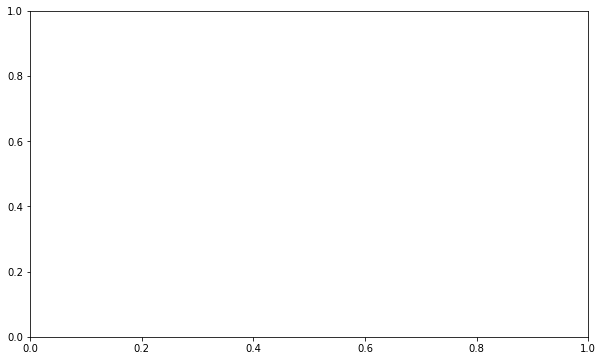

In [12]:
track = tracks[7]            # track to focus on
t0 = track['step'][0]        # first timestep
t1 = track['step'][-1]       # last timestep

# choose color
cyclone = track['type'][0]
if cyclone == -1:
    color = 'b'
if cyclone == 1:
    color = 'r'
    
fig, ax = plt.subplots(figsize=(10,6))
# initialize annotations
currTime = ax.text(2.2, 43.8, '', color='k')
lastTime = ax.text(2.2, 43.8, '', color='k')
global lastPosition
lastPosition = lastTime.get_position()
global lastText
lastText = lastTime.get_text()
def animate(i):
    global lastPosition
    global lastText
    if i in track['step']:
        step = np.where(track['step'] == i)[0][0]
        # change annotations
        currPosition = (track['x1'][step], track['y1'][step])
        if currPosition != lastTime.get_position():
            currTime.set_position(currPosition)
            lastTime.set_position(lastPosition)
        lastTime.set_text(lastText)
        currTime.set_text(str(i))
        
        # save global variables for lastTime
        lastPosition = currTime.get_position()
        lastText = currTime.get_text()
        ax.scatter(track['x1'][0:step+1], track['y1'][0:step+1], marker='o', color=color)
    plt.pause(0.001)  # allow time to draw
    return currTime, lastTime,

# frames = num of timesteps, interval = time btwn frames in ms
anim = anm.FuncAnimation(fig, animate, frames=int(t1-t0)+2, interval = 200)
HTML(anim.to_jshtml())

In [13]:
# print index before gaps
prev = 0
for step in track['step']:
    if step - prev > 1:
        # there is a gap
        fill = np.arange(prev+1, step, 1.)  # create fill
        print(prev, step, fill)
    prev = step

5.0 10.0 [6. 7. 8. 9.]
25.0 27.0 [26.]
81.0 83.0 [82.]
83.0 85.0 [84.]
85.0 88.0 [86. 87.]
96.0 107.0 [ 97.  98.  99. 100. 101. 102. 103. 104. 105. 106.]
107.0 109.0 [108.]
110.0 128.0 [111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127.]
128.0 146.0 [129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142.
 143. 144. 145.]


In [14]:
# fill and test for sequential steps
prev = 0
steps = np.array([])
for step in track['step']:
    if step - prev > 1:
        # there is a gap
        fill = np.arange(prev+1, step, 1.)  # create fill
        steps = np.append(steps, fill)
    steps = np.append(steps, step)
    prev = step
steps.flatten()
print(steps)
print()
print('Consecutive steps?', (steps == np.arange(track['step'][0], track['step'][-1]+1, 1.)).all())

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146.]

Consecutive steps? True


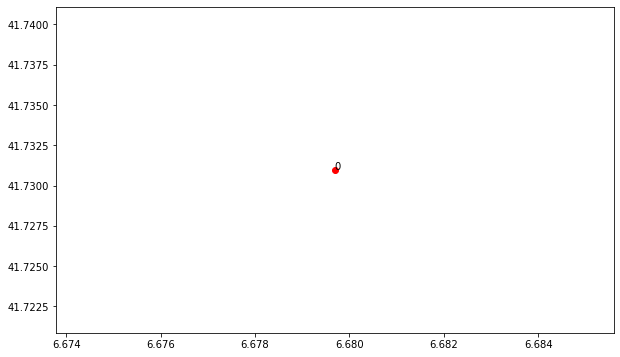

In [15]:
track = tracks[53]            # track to focus on
t0 = track['step'][0]        # first timestep
t1 = track['step'][-1]       # last timestep

# fill xs and ys (one or linear point btwn gaps?)
prev = 0
steps = np.array([])
lons = []
lats = []
for i, step in enumerate(track['step']):
    lon = track['x1'][i]
    lat = track['y1'][i]
    if step - prev > 1:
        # there is a gap
        stepFill = np.arange(prev+1, step, 1.)  # create fill
        lonFill = np.ones(len(stepFill))*((lon + track['x1'][i-1])/2)
        latFill = np.ones(len(stepFill))*((lat + track['y1'][i-1])/2)
        steps = np.append(steps, stepFill)
        lons = np.append(lons, lonFill)
        lats = np.append(lats, latFill)
    steps = np.append(steps, step)
    lons = np.append(lons, lon)
    lats = np.append(lats, lat)
    prev = step
steps.flatten()
lons.flatten()
lats.flatten()

# choose color
cyclone = track['type'][0]
if cyclone == -1:
    color = 'b'
if cyclone == 1:
    color = 'r'
    
fig, ax = plt.subplots(figsize=(10,6))
# initialize annotations
currTime = ax.text(2.2, 43.8, '', color='k')
lastTime = ax.text(2.2, 43.8, '', color='k')
global lastPosition
lastPosition = lastTime.get_position()
global lastText
lastText = lastTime.get_text()
def animate(i):
    global lastPosition
    global lastText
    if i < len(steps):
        # change annotations
        currPosition = (lons[i], lats[i])
        if currPosition != lastTime.get_position():
            currTime.set_position(currPosition)
            lastTime.set_position(lastPosition)
        lastTime.set_text(lastText)
        currTime.set_text(str(i))

        # save global variables for lastTime
        lastPosition = currTime.get_position()
        lastText = currTime.get_text()
        ax.scatter(lons[0:i+1], lats[0:i+1], marker='o', color=color)
    plt.pause(0.001)  # allow time to draw
    return currTime, lastTime,

# frames = num of timesteps, interval = time btwn frames in ms
anim = anm.FuncAnimation(fig, animate, frames=int(t1-t0)+2, interval = 200)
HTML(anim.to_jshtml())